<a href="https://colab.research.google.com/github/DiegoCorona/Gold-Silver-Price-Prediction-using-ARIMA-in-Python/blob/main/Learner_Notebook_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gold & Silver Price prediction using Arima

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, matplotlib

#pandas= data Manipulation and analysis
#Arima = Forecasting
#matplotlib= data visualization


In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 5.5 MB/s 
     |████████████████████████████████| 9.5 MB 41.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


## Importing the Dataset & Exploring it

In [3]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 8.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=60ce508048bd78c857f671a7d59725403a226bc2e717cdde155004f537210f3e
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
import yfinance as yf

df = yf.download('GC=F','2016-08-25', '2021-08-25')
df = pd.DataFrame(df)
df = df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-25,1321.400024,1324.000000,1317.000000,1320.099976,1320.099976,58
1,2016-08-26,1323.800049,1340.500000,1320.099976,1321.500000,1321.500000,141
2,2016-08-29,1315.000000,1323.000000,1315.000000,1322.900024,1322.900024,437
3,2016-08-30,1322.000000,1322.099976,1308.000000,1311.699951,1311.699951,705
4,2016-08-31,1310.300049,1313.699951,1306.300049,1306.900024,1306.900024,214


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1245 non-null   datetime64[ns]
 1   Open       1245 non-null   float64       
 2   High       1245 non-null   float64       
 3   Low        1245 non-null   float64       
 4   Close      1245 non-null   float64       
 5   Adj Close  1245 non-null   float64       
 6   Volume     1245 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.2 KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,1460.540964,1467.009319,1453.832290,1460.432772,1460.432772,5970.155020
std,248.265306,251.178778,245.379244,248.397246,248.397246,33619.209861
min,1126.900024,1132.800049,1123.900024,1127.800049,1127.800049,0.000000
25%,1267.400024,1270.199951,1262.000000,1266.500000,1266.500000,34.000000
50%,1325.900024,1329.300049,1321.699951,1324.699951,1324.699951,147.000000
75%,1716.599976,1728.800049,1705.000000,1720.300049,1720.300049,501.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


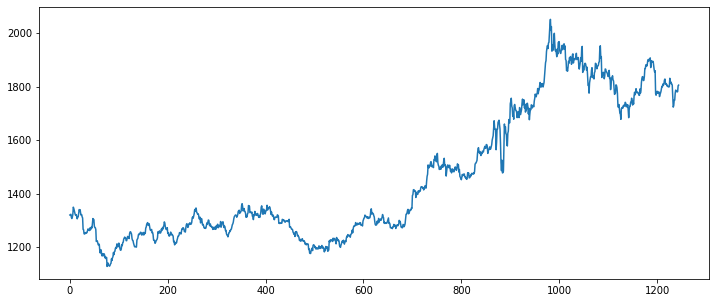

In [8]:
df['Close'].plot(figsize = (12, 5))

# Understanding Auto Regressive Integrated Moving Average (ARIMA)

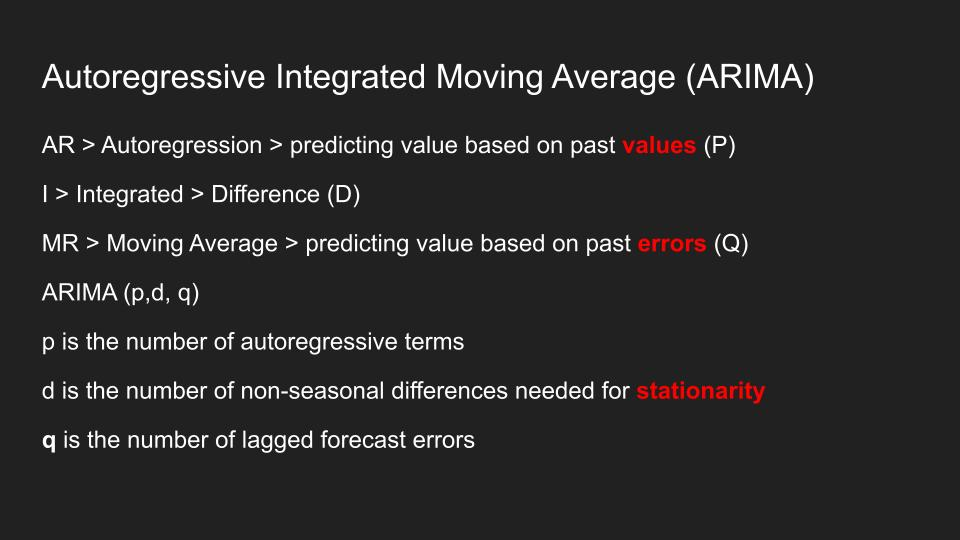

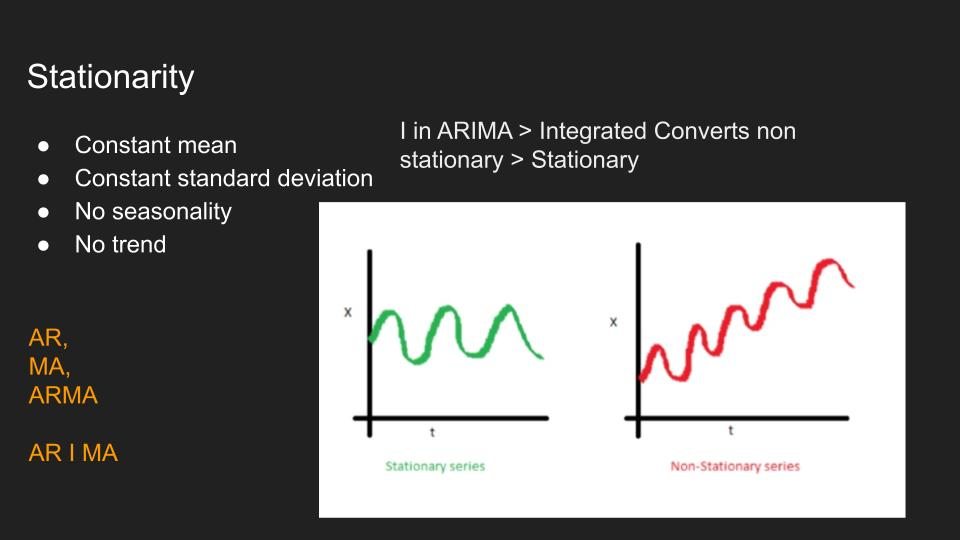

#Finding Order (P,D,Q)

In [9]:
from pmdarima import auto_arima

In [10]:
df = df.dropna()
best_order = auto_arima(df['Close'], trace= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10203.330, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10199.066, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10200.861, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10200.876, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10197.959, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10202.398, Time=0.92 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.403 seconds


## Data Preperation-Train Test Split

In [11]:
columns = ['Close']
df = pd.DataFrame(df, columns = columns)

In [12]:
df

,Close
0,1320.099976
1,1321.500000
2,1322.900024
3,1311.699951
4,1306.900024
...,...
1240,1781.599976
1241,1780.199951
1242,1781.000000
1243,1803.199951


In [13]:
train, test = df[0: int(len(df) * 0.85)], df[int(len(df) * 0.85):]

In [14]:
train.shape, test.shape

((1058, 1), (187, 1))

In [15]:
df.shape

(1245, 1)

## Creating ARIMA Model

In [16]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train, order= (0,1,0))
model = model.fit()

model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1057
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4276.936
Method:                           css   S.D. of innovations             13.837
Date:                Fri, 27 Aug 2021   AIC                           8557.872
Time:                        18:43:36   BIC                           8567.798
Sample:                             1   HQIC                          8561.634
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5227      0.426      1.228      0.219      -0.311       1.357
==============================================================================
"""

## Forecasting

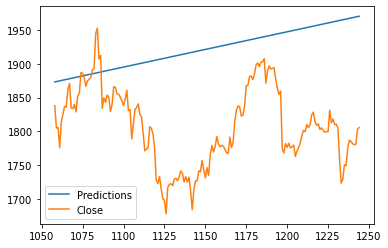

In [56]:
pred= model.forecast(steps = len(test))[0]
pred = pd.Series(pred)
plt.plot(test.index, pred, label = 'Predictions')
plt.legend()
test['Close'].plot(legend=True)

### Error

In [43]:
## ERROR
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

132.72906493479633


##More Forecast Graphs

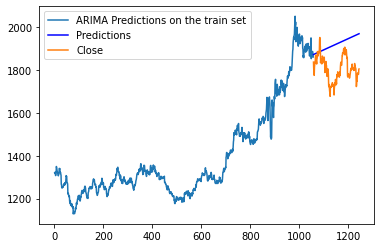

In [62]:
start=1
end=len(train) - 1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions on the train set')
pred.plot(legend=True)

model_pred= model.forecast(steps = len(test))[0]
model_pred = pd.Series(model_pred)
plt.plot(test.index, model_pred, label = 'Predictions', color = 'blue')
plt.legend()

test['Close'].plot(legend=True)

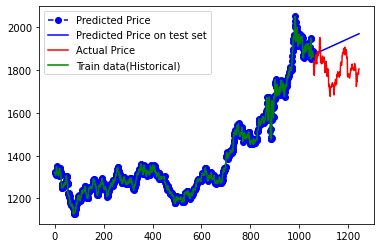

In [67]:
start=1
end= len(train) -1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price')

model_pred= model.forecast(steps = len(test))[0]
model_pred = pd.Series(model_pred)
plt.plot(test.index, model_pred, label = 'Predicted Price on test set', color = 'blue')
plt.legend()

test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')



## 30 days into the future

In [72]:
import numpy as np

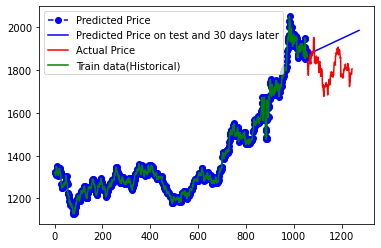

In [80]:
### 30 days into the future

start=1
end= len(train) - 1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price')

model_pred= model.forecast(steps = len(test) + 30)[0]
model_pred = pd.Series(model_pred)
plt.plot(np.append(test.index, list(range(test.index.max(), test.index.max() + 30))), 
         model_pred, label = 'Predicted Price on test and 30 days later', color = 'blue')
plt.legend()

test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')



# Forcasting automatication

In [83]:
import yfinance as yf

df = yf.download('SI=F','2020-06-21', '2021-06-21')
df = pd.DataFrame(df)
df = df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [84]:
from pmdarima import auto_arima

df = df.dropna()
best_order = auto_arima(df['Close'], trace= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=530.383, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=535.698, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=524.949, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=525.671, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=534.223, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=526.902, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=526.903, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=528.902, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=523.766, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=525.687, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=525.693, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=524.570, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=527.687, Time=0.17 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.579 seconds


In [85]:
columns = ['Close']
df = pd.DataFrame(df, columns = columns)

train, test = df[0: int(len(df) * 0.85)], df[int(len(df) * 0.85):]

In [89]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train, order= best_order.order)
model = model.fit()

model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  210
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -228.785
Method:                       css-mle   S.D. of innovations              0.719
Date:                Fri, 27 Aug 2021   AIC                            463.570
Time:                        19:42:50   BIC                            473.611
Sample:                             1   HQIC                           467.629
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0394      0.040      0.975      0.329      -0.040       0.119
ar.L1.D.Close    -0.2281      0.067     -3.404      0.001      -0.359      -0.097
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.3840           +0.0000j            4.3840            0.5000
-----------------------------------------------------------------------------
"""

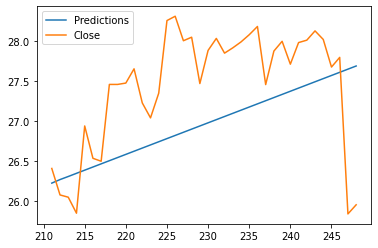

In [90]:
pred= model.forecast(steps = len(test))[0]
pred = pd.Series(pred)
plt.plot(test.index, pred, label = 'Predictions')
plt.legend()
test['Close'].plot(legend=True)

In [91]:
## ERROR
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

0.8361667320147514


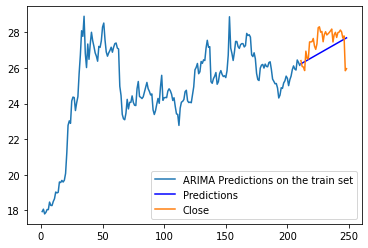

In [92]:
start=1
end=len(train) - 1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions on the train set')
pred.plot(legend=True)

model_pred= model.forecast(steps = len(test))[0]
model_pred = pd.Series(model_pred)
plt.plot(test.index, model_pred, label = 'Predictions', color = 'blue')
plt.legend()

test['Close'].plot(legend=True)

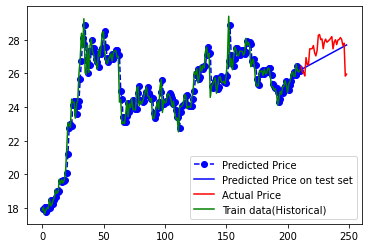

In [93]:
start=1
end= len(train) -1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price')

model_pred= model.forecast(steps = len(test))[0]
model_pred = pd.Series(model_pred)
plt.plot(test.index, model_pred, label = 'Predicted Price on test set', color = 'blue')
plt.legend()

test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')


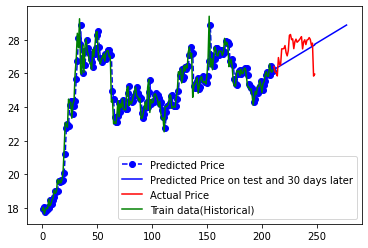

In [94]:
### 30 days into the future

start=1
end= len(train) - 1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price')

model_pred= model.forecast(steps = len(test) + 30)[0]
model_pred = pd.Series(model_pred)
plt.plot(np.append(test.index, list(range(test.index.max(), test.index.max() + 30))), 
         model_pred, label = 'Predicted Price on test and 30 days later', color = 'blue')
plt.legend()

test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')


In [99]:
model_pred[-30:]

38    27.731766
39    27.771210
40    27.810654
41    27.850099
42    27.889543
43    27.928987
44    27.968432
45    28.007876
46    28.047320
47    28.086764
48    28.126209
49    28.165653
50    28.205097
51    28.244542
52    28.283986
53    28.323430
54    28.362875
55    28.402319
56    28.441763
57    28.481207
58    28.520652
59    28.560096
60    28.599540
61    28.638985
62    28.678429
63    28.717873
64    28.757318
65    28.796762
66    28.836206
67    28.875650
dtype: float64